### 버섯의 특징에 따른 독버섯 분류모델
> https://www.kaggle.com/datasets/vishalpnaik/mushroom-classification-edible-or-poisonous

1. class - 독버섯과 일반버섯 구분(p - poison, e - edible)(target)
2. cap-diameter - 버섯 캡 지름
3. cap-shape - 버섯 캡 모양
4. cap-surface - 버섯 캡 표면(질감 등)
5. cap-color - 버섯 캡 색상
6. does-bruise-or-bleed - 버섯 특징(상처입거나 압력을 받을 때 색깔이 변하거나 출혈하는 여부)
7. gill-attachment - 버섯 잔가락
8. gill-spacing - 잔가락 간격
9. gill-color - 잔가락 색상
10. stem-height - 줄기 높이
11. stem-width - 줄기 너비
12. stem-root - 줄기 뿌리
13. stem-surface - 줄기 표면
14. stem-color - 줄기 색상
15. veil-type - 베일 유형(버섯 캡 아래 얇고 막힌 층)
16. veil-color - 베일 색상
17. has-ring - 버섯 줄기 주변 고리
18. ring-type - 고리 유형
19. spore-print-color - 포자가 표면에 떨어져 남긴 색상
20. habitat - 버섯의 서식지
21. season - 버섯의 출현 시기

In [1]:
import pandas as pd
mr_df_origin = pd.read_csv('./datasets/mushroom.csv')
mr_df = mr_df_origin.copy()
mr_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [2]:
mr_df.duplicated().sum()

146

In [3]:
mr_df = mr_df.drop_duplicates()

In [4]:
mr_df.duplicated().sum()

0

In [5]:
mr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           46803 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       51068 non-null  object 
 7   gill-spacing          35861 non-null  object 
 8   gill-color            60923 non-null  object 
 9   stem-height           60923 non-null  float64
 10  stem-width            60923 non-null  float64
 11  stem-root             9387 non-null   object 
 12  stem-surface          22801 non-null  object 
 13  stem-color            60923 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color            74

In [6]:
mr_df.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51536
stem-surface            38122
stem-color                  0
veil-type               57746
veil-color              53510
has-ring                    0
ring-type                2471
spore-print-color       54597
habitat                     0
season                      0
dtype: int64

In [7]:
# 버섯 캡 표면(질감)
mr_df['cap-surface'].value_counts()

cap-surface
t    8184
s    7580
y    6341
h    4974
g    4722
d    4432
e    2584
k    2303
i    2225
w    2150
l    1308
Name: count, dtype: int64

In [8]:
# 버섯 잔가락 유형
mr_df['gill-attachment'].value_counts()

gill-attachment
a    12697
d    10247
x     7413
p     6001
e     5648
s     5648
f     3414
Name: count, dtype: int64

In [9]:
# 고리 타입
mr_df['ring-type'].value_counts()

ring-type
f    48215
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: count, dtype: int64

In [10]:
# 고리 타입은 결측치가 조금밖에 없지만 대체할 순 없다고 판단하여 결측치 제거
mr_df = mr_df[~ mr_df['ring-type'].isna()]
mr_df.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             13767
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9502
gill-spacing            24003
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               49418
stem-surface            36710
stem-color                  0
veil-type               55275
veil-color              51745
has-ring                    0
ring-type                   0
spore-print-color       52832
habitat                     0
season                      0
dtype: int64

In [11]:
# 크게 중요하지않고 대체하기 힘들 것 같다 판단하여 드랍
mr_df = mr_df.drop(labels=[
                             'cap-surface', 
                             'gill-attachment',
                             'gill-spacing',
                             'stem-root', 
                             'stem-surface', 
                             'veil-type', 
                             'veil-color', 
                             'spore-print-color'], axis=1)

In [12]:
mr_df

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,o,f,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,o,f,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,o,f,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,e,f,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,o,f,w,16.53,17.20,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,y,f,f,3.93,6.22,y,f,f,d,a
61065,p,1.27,f,y,f,f,3.18,5.43,y,f,f,d,a
61066,p,1.27,s,y,f,f,3.86,6.37,y,f,f,d,u
61067,p,1.24,f,y,f,f,3.56,5.44,y,f,f,d,u


array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'stem-height'}>],
       [<Axes: title={'center': 'stem-width'}>, <Axes: >]], dtype=object)

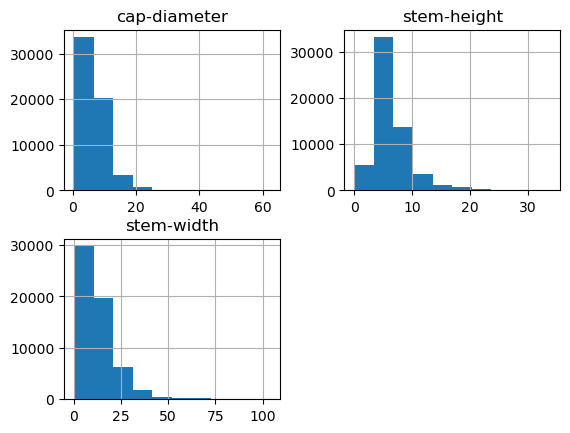

In [13]:
mr_df.hist()

In [14]:
# 타겟 컬럼을 맨 뒤로 보냄
mr_df['target'] = mr_df['class']
mr_df

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,target
0,p,15.26,x,o,f,w,16.95,17.09,w,t,g,d,w,p
1,p,16.60,x,o,f,w,17.99,18.19,w,t,g,d,u,p
2,p,14.07,x,o,f,w,17.80,17.74,w,t,g,d,w,p
3,p,14.17,f,e,f,w,15.77,15.98,w,t,p,d,w,p
4,p,14.64,x,o,f,w,16.53,17.20,w,t,p,d,w,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,y,f,f,3.93,6.22,y,f,f,d,a,p
61065,p,1.27,f,y,f,f,3.18,5.43,y,f,f,d,a,p
61066,p,1.27,s,y,f,f,3.86,6.37,y,f,f,d,u,p
61067,p,1.24,f,y,f,f,3.56,5.44,y,f,f,d,u,p


In [15]:
mr_df = mr_df.drop(labels=['class'], axis=1)
mr_df

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,target
0,15.26,x,o,f,w,16.95,17.09,w,t,g,d,w,p
1,16.60,x,o,f,w,17.99,18.19,w,t,g,d,u,p
2,14.07,x,o,f,w,17.80,17.74,w,t,g,d,w,p
3,14.17,f,e,f,w,15.77,15.98,w,t,p,d,w,p
4,14.64,x,o,f,w,16.53,17.20,w,t,p,d,w,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,y,f,f,3.93,6.22,y,f,f,d,a,p
61065,1.27,f,y,f,f,3.18,5.43,y,f,f,d,a,p
61066,1.27,s,y,f,f,3.86,6.37,y,f,f,d,u,p
61067,1.24,f,y,f,f,3.56,5.44,y,f,f,d,u,p


In [16]:
# StandardScaler로 변환한 값 중 -1.96 ~ 1.96을 벗어난 범위의 값 확인
import numpy as np
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

features = ['cap-diameter', 'stem-height', 'stem-width']

total_count = mr_df.shape[0]
for feature in features:
    std_df = std.fit_transform(mr_df[[feature]])
    count = ((std_df < -1.96) | (std_df > 1.96)).sum()
    print(f'{feature}: {count}건, {np.round(count / total_count * 100, 4)}%')

cap-diameter: 1893건, 3.2386%
stem-height: 2566건, 4.3899%
stem-width: 2348건, 4.017%


In [17]:
# 이상치도 많지않아 제거
sbp_df = mr_df.loc[:, 'cap-diameter'].reset_index()
std_sbp_df = std.fit_transform(sbp_df[['cap-diameter']])
sbp_df['cap-diameter'] = std_sbp_df
sbp_df = sbp_df[sbp_df['cap-diameter'].between(-1.96, 1.96)]
mr_df = mr_df.iloc[sbp_df.index].reset_index(drop=True)

dbp_df = mr_df.loc[:, 'stem-height'].reset_index()
std_dbp_df = std.fit_transform(dbp_df[['stem-height']])
dbp_df['stem-height'] = std_dbp_df
dbp_df = dbp_df[dbp_df['stem-height'].between(-1.96, 1.96)]
mr_df = mr_df.iloc[dbp_df.index].reset_index(drop=True)

blds_df = mr_df.loc[:, 'stem-width'].reset_index()
std_blds_df = std.fit_transform(blds_df[['stem-width']])
blds_df['stem-width'] = std_blds_df
blds_df = blds_df[blds_df['stem-width'].between(-1.96, 1.96)]
mr_df = mr_df.iloc[blds_df.index].reset_index(drop=True)

mr_df

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,target
0,6.87,x,n,f,w,6.88,13.64,w,t,p,d,a,p
1,8.59,p,n,f,w,9.15,17.34,w,t,p,d,a,p
2,5.95,p,n,f,w,7.54,12.73,w,t,p,d,u,p
3,6.51,x,n,f,w,6.80,12.92,w,t,p,d,a,p
4,7.66,x,n,f,w,8.55,14.98,w,t,p,d,a,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50912,1.18,s,y,f,f,3.93,6.22,y,f,f,d,a,p
50913,1.27,f,y,f,f,3.18,5.43,y,f,f,d,a,p
50914,1.27,s,y,f,f,3.86,6.37,y,f,f,d,u,p
50915,1.24,f,y,f,f,3.56,5.44,y,f,f,d,u,p


In [18]:
from sklearn.preprocessing import LabelEncoder

# 인코딩
columns = ['cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season', 'target']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    mr_df[column] = encoder.fit_transform(mr_df[column])
    encoders[column] = encoder.classes_.tolist()

In [19]:
mr_df

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,target
0,6.87,6,5,0,10,6.88,13.64,10,1,4,0,0,1
1,8.59,4,5,0,10,9.15,17.34,10,1,4,0,0,1
2,5.95,4,5,0,10,7.54,12.73,10,1,4,0,2,1
3,6.51,6,5,0,10,6.80,12.92,10,1,4,0,0,1
4,7.66,6,5,0,10,8.55,14.98,10,1,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50912,1.18,5,11,0,2,3.93,6.22,11,0,1,0,0,1
50913,1.27,2,11,0,2,3.18,5.43,11,0,1,0,0,1
50914,1.27,5,11,0,2,3.86,6.37,11,0,1,0,2,1
50915,1.24,2,11,0,2,3.56,5.44,11,0,1,0,2,1


In [20]:
# 0 - 식용, 1 - 독성
encoders['target']

['e', 'p']

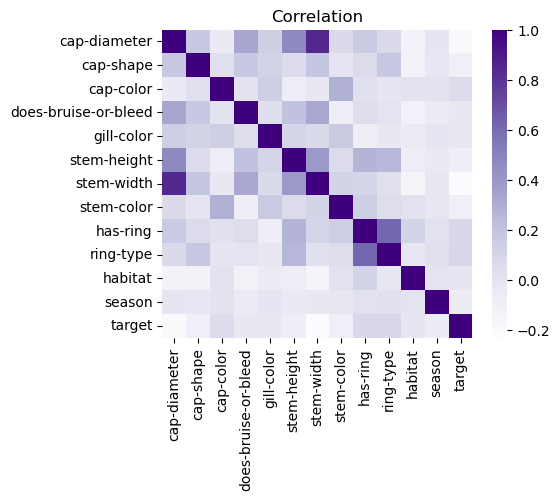

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 4))
corr = mr_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [22]:
corr = mr_df.corr()
corr[['target']].sort_values(by='target', ascending=False)[1:]

,target
ring-type,0.095623
has-ring,0.090753
cap-color,0.063815
habitat,-0.009529
does-bruise-or-bleed,-0.024577
gill-color,-0.028574
season,-0.058860
stem-height,-0.073438
stem-color,-0.087070
cap-shape,-0.089115


- 타겟피처와 상관관계가 모두 낮다

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

### dtc

In [24]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = mr_df.iloc[:, :-1], mr_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# target피쳐의 불균형을 업샘플링
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()

target
1    22508
0    22508
Name: count, dtype: int64

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()

dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [26]:
# from sklearn.tree import export_graphviz

# export_graphviz(
#     dtc, 
#     out_file='./images/mushroom01.dot', 
#     class_names=encoders['target'], 
#     feature_names=features.columns, 
#     impurity=True, 
#     filled=True
# )

In [27]:
# import graphviz

# with open('./images/mushroom01.dot') as f:
#     mushroom_dtc01 = f.read()

# mushroom_dtc01_graph = graphviz.Source(mushroom_dtc01)

In [28]:
# mushroom_dtc01_graph.render(filename='mushroom01', directory='./images', format='png')

<img src="./images/mushroom01.png">

#### dtc 오차행렬

오차 행렬
[[4483   73]
 [  61 5567]]
정확도: 0.9868, 정밀도: 0.9871, 재현율: 0.9892, F1: 0.9881, ROC-AUC: 0.9866
################################################################################


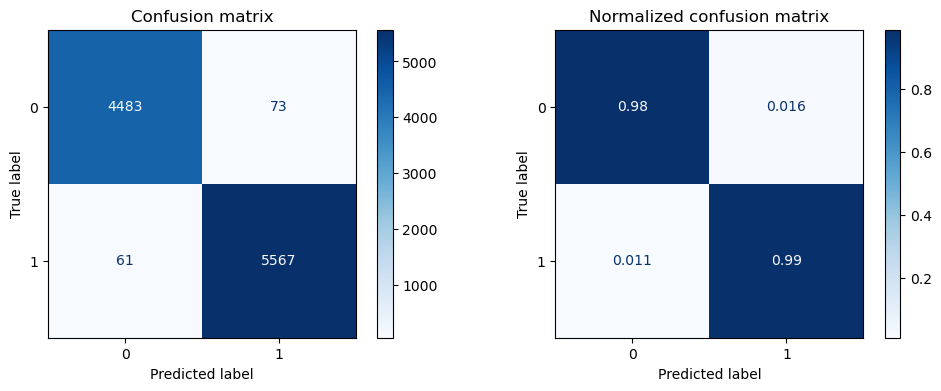

In [29]:
prediction = dtc.predict(X_test)
get_evaluation(y_test, prediction, dtc, X_test)

In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc_parameters = {'max_depth': [24, 25, 26], 'min_samples_split': [50, 51, 52]}

dtc = DecisionTreeClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

In [32]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [24, 25, 26],
                         'min_samples_split': [50, 51, 52]},
             return_train_score=True)

In [33]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_

,params,mean_test_score,rank_test_score
0,"{'max_depth': 24, 'min_samples_split': 50}",0.969700,2
1,"{'max_depth': 24, 'min_samples_split': 51}",0.969411,6
2,"{'max_depth': 24, 'min_samples_split': 52}",0.969055,7
3,"{'max_depth': 25, 'min_samples_split': 50}",0.969588,3
4,"{'max_depth': 25, 'min_samples_split': 51}",0.969411,5
5,"{'max_depth': 25, 'min_samples_split': 52}",0.968966,8
6,"{'max_depth': 26, 'min_samples_split': 50}",0.969833,1
7,"{'max_depth': 26, 'min_samples_split': 51}",0.969433,4
8,"{'max_depth': 26, 'min_samples_split': 52}",0.968722,9


#### 교차검증 후 dtc

오차 행렬
[[4436  120]
 [ 109 5519]]
정확도: 0.9775, 정밀도: 0.9787, 재현율: 0.9806, F1: 0.9797, ROC-AUC: 0.9771
################################################################################


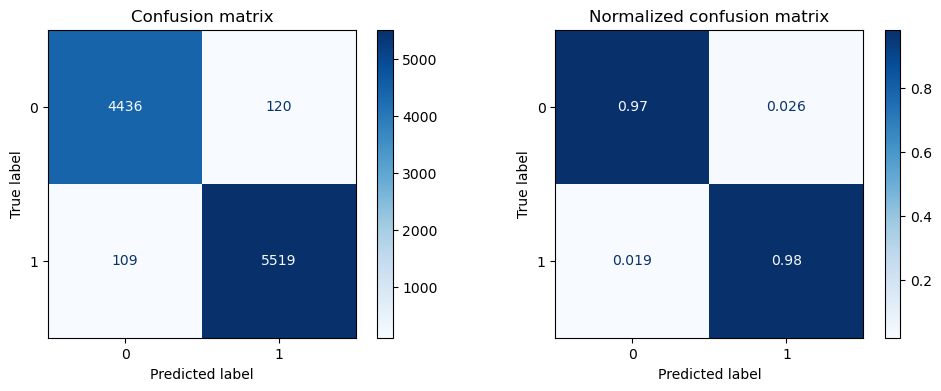

In [34]:
dtc_prediction = dtc.predict(X_test)
get_evaluation(y_test, dtc_prediction, dtc, X_test)

### K-Nearest Neighbor(최근접 이웃)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_parameters = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

knn = KNeighborsClassifier()

knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [36]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(knn_result_df['params'].iloc[3])
display(knn_result_df)

knn = KNeighborsClassifier(n_neighbors=9)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

knn_pipe.fit(X_train_over, y_train_over)

{'knn__n_neighbors': 9}


,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.991581,1
1,{'knn__n_neighbors': 5},0.988471,2
2,{'knn__n_neighbors': 7},0.984206,3
3,{'knn__n_neighbors': 9},0.980674,4
4,{'knn__n_neighbors': 11},0.978119,5


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

오차 행렬
[[4504   52]
 [  81 5547]]
정확도: 0.9869, 정밀도: 0.9907, 재현율: 0.9856, F1: 0.9882, ROC-AUC: 0.9871
################################################################################


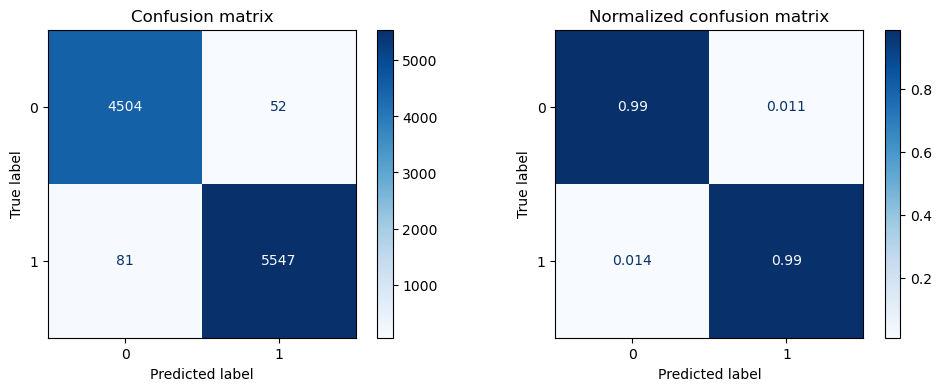

In [37]:
knn_prediction = knn_pipe.predict(X_test)
get_evaluation(y_test, knn_prediction, knn_pipe, X_test)

### svc
> fit하는데 열시간 이상 경과해도 학습이 되지않아 다른 데이터셋으로 해보기

In [38]:
# from sklearn.svm import SVC
# svc_parameters = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
#                   'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
#                   'svc__kernel': ['linear', 'rbf']}

# svc = SVC(probability=True, verbose=True)

# svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
# g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

In [39]:
# g_svc.fit(X_train_over, y_train_over)

### 랜덤 포레스트

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth': [24, 25, 26], 
    'min_samples_split': [50, 51, 52]
}

rfc = RandomForestClassifier(n_estimators=100)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [24, 25, 26],
                         'min_samples_split': [50, 51, 52]})

In [41]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 24, 'min_samples_split': 50}",0.993002,1
1,"{'max_depth': 24, 'min_samples_split': 51}",0.992314,9
2,"{'max_depth': 24, 'min_samples_split': 52}",0.992536,7
3,"{'max_depth': 25, 'min_samples_split': 50}",0.992914,2
4,"{'max_depth': 25, 'min_samples_split': 51}",0.992736,3
5,"{'max_depth': 25, 'min_samples_split': 52}",0.992647,6
6,"{'max_depth': 26, 'min_samples_split': 50}",0.992358,8
7,"{'max_depth': 26, 'min_samples_split': 51}",0.992714,5
8,"{'max_depth': 26, 'min_samples_split': 52}",0.992736,3


In [42]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

#### RandomForest 오차행렬

오차 행렬
[[4520   36]
 [  37 5591]]
정확도: 0.9928, 정밀도: 0.9936, 재현율: 0.9934, F1: 0.9935, ROC-AUC: 0.9928
################################################################################


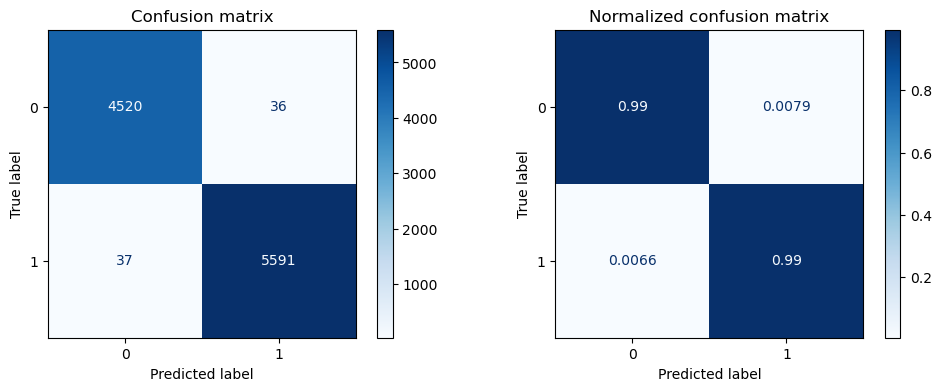

In [43]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

- 랜덤포레스트가 결과가 굉장히 좋다

### boosting - adaboost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

parmeters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

adabc = AdaBoostClassifier()

g_ada = GridSearchCV(adabc, param_grid=parmeters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [45]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.701973,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.725253,10
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.736160,9
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.723232,11
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.742736,7
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.749178,5
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.737582,8
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.751644,4
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.759374,3
9,"{'learning_rate': 1, 'n_estimators': 50}",0.745335,6


In [46]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)

### ada 오차행렬

오차 행렬
[[3636  920]
 [1466 4162]]
정확도: 0.7657, 정밀도: 0.8190, 재현율: 0.7395, F1: 0.7772, ROC-AUC: 0.7688
################################################################################


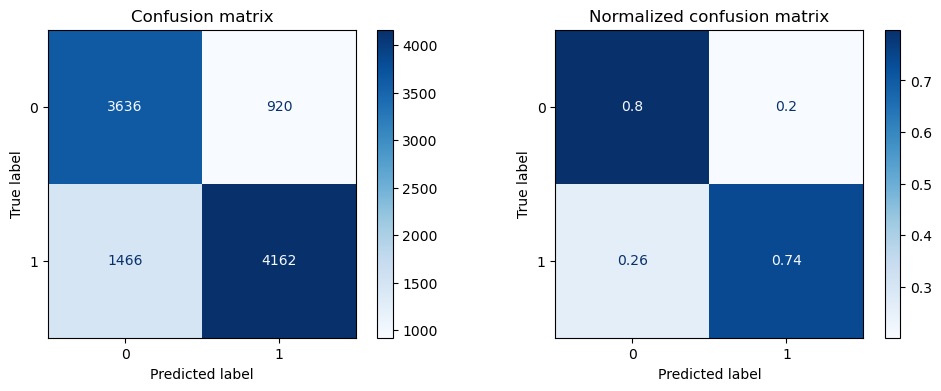

In [47]:
get_evaluation(y_test, ada_prediction, ada, X_test)

- 모든 수치가 조금씩 낮은 모습

### boosting - GBM

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=5)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [49]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.912187,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.949329,10
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.989426,4
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.934934,11
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.968811,7
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.992314,1
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.949485,9
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.974565,6
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.991136,2
9,"{'learning_rate': 1, 'n_estimators': 50}",0.962747,8


In [50]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

#### GBM 오차행렬

오차 행렬
[[4531   25]
 [  31 5597]]
정확도: 0.9945, 정밀도: 0.9956, 재현율: 0.9945, F1: 0.9950, ROC-AUC: 0.9945
################################################################################


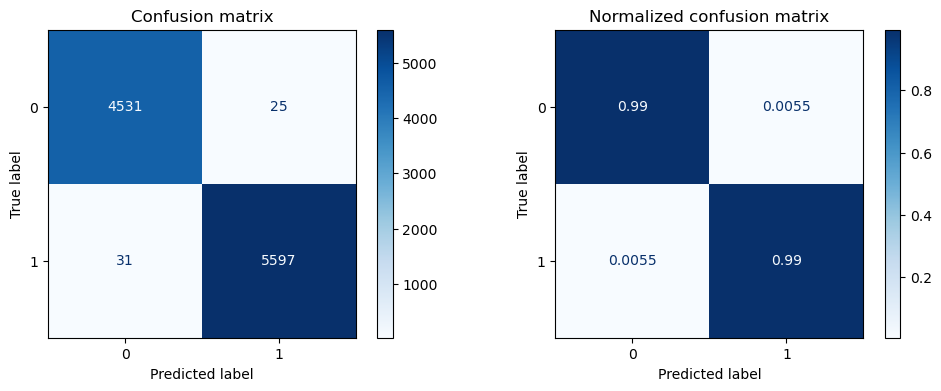

In [51]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

### boosting - XGBoost

In [52]:
from xgboost import XGBClassifier

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [53]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-logloss:0.61238	validation_1-logloss:0.60902
[1]	validation_0-logloss:0.54481	validation_1-logloss:0.53905
[2]	validation_0-logloss:0.51003	validation_1-logloss:0.50341
[3]	validation_0-logloss:0.46201	validation_1-logloss:0.45711
[4]	validation_0-logloss:0.40652	validation_1-logloss:0.40215
[5]	validation_0-logloss:0.37776	validation_1-logloss:0.37376
[6]	validation_0-logloss:0.35798	validation_1-logloss:0.35516
[7]	validation_0-logloss:0.31916	validation_1-logloss:0.31821


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.29384	validation_1-logloss:0.29196
[9]	validation_0-logloss:0.27867	validation_1-logloss:0.27548
[10]	validation_0-logloss:0.25689	validation_1-logloss:0.25476
[11]	validation_0-logloss:0.24779	validation_1-logloss:0.24572
[12]	validation_0-logloss:0.23830	validation_1-logloss:0.23700
[13]	validation_0-logloss:0.22027	validation_1-logloss:0.21952
[14]	validation_0-logloss:0.21577	validation_1-logloss:0.21481
[15]	validation_0-logloss:0.21130	validation_1-logloss:0.21032
[16]	validation_0-logloss:0.19523	validation_1-logloss:0.19492
[17]	validation_0-logloss:0.18464	validation_1-logloss:0.18504
[18]	validation_0-logloss:0.17953	validation_1-logloss:0.17919
[19]	validation_0-logloss:0.17410	validation_1-logloss:0.17368
[20]	validation_0-logloss:0.17234	validation_1-logloss:0.17193
[21]	validation_0-logloss:0.16866	validation_1-logloss:0.16840
[22]	validation_0-logloss:0.16314	validation_1-logloss:0.16289
[23]	validation_0-logloss:0.15737	validation_1-logloss:0.

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [54]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.988026,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.994224,8
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.995890,1
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.993558,11
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.995557,2
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.995424,3
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.994202,9
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.995179,5
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.995402,4
9,"{'learning_rate': 1, 'n_estimators': 50}",0.994113,10


In [55]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

#### XGBoost 오차행렬

오차 행렬
[[4538   18]
 [  20 5608]]
정확도: 0.9963, 정밀도: 0.9968, 재현율: 0.9964, F1: 0.9966, ROC-AUC: 0.9962
################################################################################


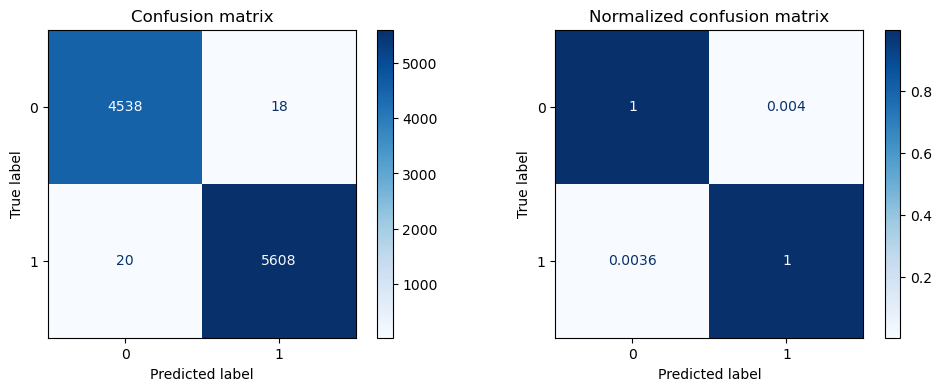

In [56]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

### boosting - LightGBM

In [57]:
from lightgbm import LGBMClassifier

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Number of positive: 22508, number of negative: 22508
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 45016, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [58]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.992469,7
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.995713,3
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.996357,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.994180,5
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.995668,4
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.996468,1
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.993869,6
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.979496,8
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.939931,11
9,"{'learning_rate': 1, 'n_estimators': 50}",0.979096,9


In [59]:
lgbm = g_lgbm.best_estimator_

lgbm_prediction = lgbm.predict(X_test)

#### LightGBM 오차행렬

오차 행렬
[[4539   17]
 [  17 5611]]
정확도: 0.9967, 정밀도: 0.9970, 재현율: 0.9970, F1: 0.9970, ROC-AUC: 0.9966
################################################################################


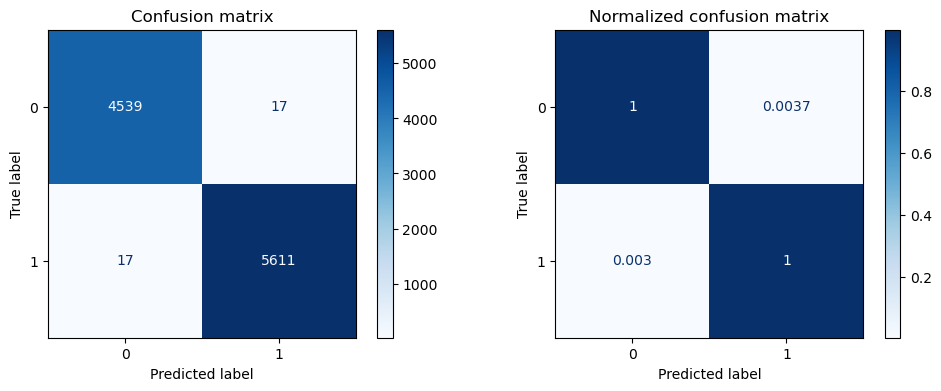

In [60]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

### Voting

In [61]:
from sklearn.ensemble import VotingClassifier

# 오차 행렬
# [[4544   13]
#  [  18 5609]]
# 정확도: 0.9970, 정밀도: 0.9977, 재현율: 0.9968, F1: 0.9972, ROC-AUC: 0.9970

# vc = VotingClassifier(estimators=[('dtc', dtc),
#                                   ('rfc', rfc),
#                                   ('gbc', gbc),
#                                   ('xgb', xgb),
#                                   ('lgbm', lgbm),
#                                   ('ada', ada),
#                                   ('knn', knn_pipe)], 
#                                   voting='hard', 
#                                   n_jobs=-1)

# 오차 행렬
# [[4546   11]
#  [  14 5613]]
# 정확도: 0.9975, 정밀도: 0.9980, 재현율: 0.9975, F1: 0.9978, ROC-AUC: 0.9975

# 전체적이게 soft가 더 높다
vc = VotingClassifier(estimators=[('dtc', dtc),
                                  ('rfc', rfc),
                                  ('gbc', gbc),
                                  ('xgb', xgb),
                                  ('lgbm', lgbm),
                                  ('ada', ada),
                                  ('knn', knn_pipe)], 
                                  voting='soft', 
                                  n_jobs=-1)

- 전부 다 0.9 이상이라 그냥 전부 넣고 보팅해보았다

In [62]:
vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=26,
                                                     min_samples_split=50)),
                             ('rfc',
                              RandomForestClassifier(max_depth=24,
                                                     min_samples_split=50)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.5,
                                                         n_estimators=500)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsampl...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm',
                              LGBMClassifier(learning_rate=0.5,
                                             n_estimators=500)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=150)),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=9))]))],
                 n_jobs=-1, voting='soft')

오차 행렬
[[4540   16]
 [  18 5610]]
정확도: 0.9967, 정밀도: 0.9972, 재현율: 0.9968, F1: 0.9970, ROC-AUC: 0.9966
################################################################################


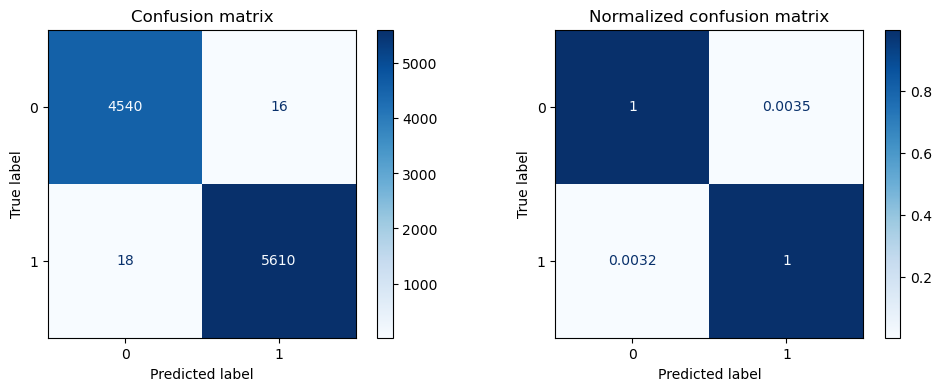

In [63]:
vc_prediction = vc.predict(X_test)
get_evaluation(y_test, vc_prediction, vc, X_test)

Model		Accuracy	Precision	Recall		F1 Score
dtc		0.9775		0.9787		0.9806		0.9797
rfc		0.9928		0.9936		0.9934		0.9935
gbc		0.9945		0.9956		0.9945		0.9950
xgb		0.9963		0.9968		0.9964		0.9966
lgbm		0.9967		0.9970		0.9970		0.9970
ada		0.7657		0.8190		0.7395		0.7772
knn		0.9869		0.9907		0.9856		0.9882
vc		0.9967		0.9972		0.9968		0.9970


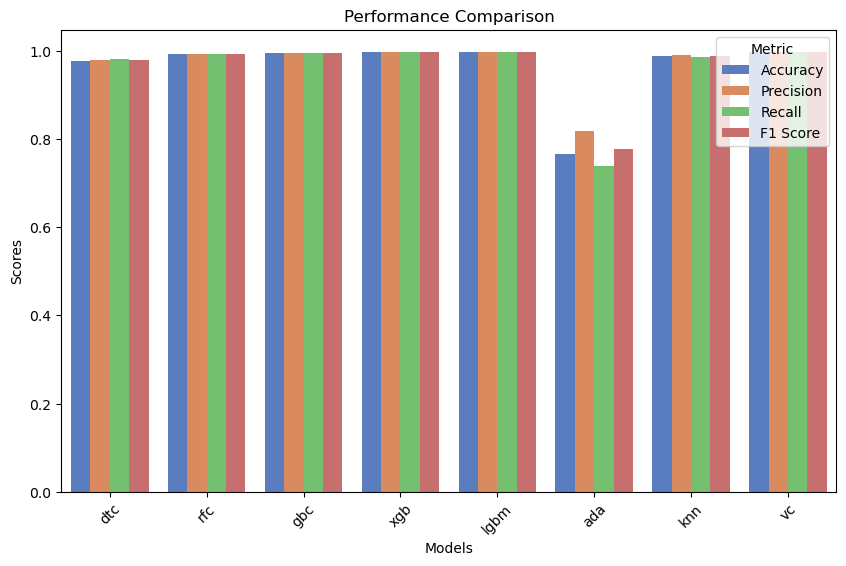

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_names = ['dtc', 'rfc', 'gbc', 'xgb', 'lgbm', 'ada', 'knn', 'vc']

accuracies = [accuracy_score(y_test, dtc_prediction), accuracy_score(y_test, rfc_prediction), accuracy_score(y_test, gbc_prediction),
              accuracy_score(y_test, xgb_prediction), accuracy_score(y_test, lgbm_prediction), accuracy_score(y_test, ada_prediction),
              accuracy_score(y_test, knn_prediction), accuracy_score(y_test, vc_prediction)]
precisions = [precision_score(y_test, dtc_prediction), precision_score(y_test, rfc_prediction), precision_score(y_test, gbc_prediction),
              precision_score(y_test, xgb_prediction), precision_score(y_test, lgbm_prediction), precision_score(y_test, ada_prediction),
              precision_score(y_test, knn_prediction), precision_score(y_test, vc_prediction)]
recalls = [recall_score(y_test, dtc_prediction), recall_score(y_test, rfc_prediction), recall_score(y_test, gbc_prediction),
           recall_score(y_test, xgb_prediction), recall_score(y_test, lgbm_prediction), recall_score(y_test, ada_prediction),
           recall_score(y_test, knn_prediction), recall_score(y_test, vc_prediction)]
f1_scores = [f1_score(y_test, dtc_prediction), f1_score(y_test, rfc_prediction), f1_score(y_test, gbc_prediction),
             f1_score(y_test, xgb_prediction), f1_score(y_test, lgbm_prediction), f1_score(y_test, ada_prediction),
             f1_score(y_test, knn_prediction), f1_score(y_test, vc_prediction)]

# 성능 지표 출력
print("Model\t\tAccuracy\tPrecision\tRecall\t\tF1 Score")
for i in range(len(model_names)):
    print(f"{model_names[i]}\t\t{accuracies[i]:.4f}\t\t{precisions[i]:.4f}\t\t{recalls[i]:.4f}\t\t{f1_scores[i]:.4f}")

# 데이터프레임 생성
import pandas as pd
data = pd.DataFrame({
    'Model': model_names * 4,
    'Metric': ['Accuracy'] * 8 + ['Precision'] * 8 + ['Recall'] * 8 + ['F1 Score'] * 8,
    'Score': accuracies + precisions + recalls + f1_scores
})

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=data, palette='muted')
plt.title('Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

- 시각화로 비교해보았때 vc를 제외하고 모든 수치가 가장 높은건 lgbm이고 다음은 xgb이다

#### 정밀도와 재현율 그래프
> 가장 결과가 좋았던 VC모델 사용

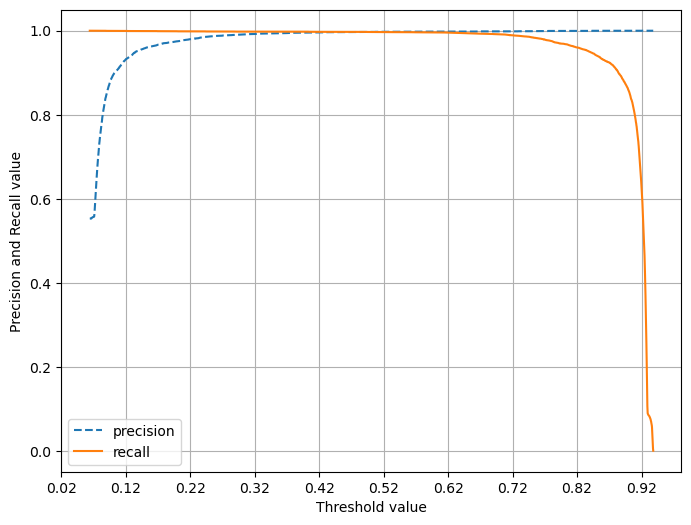

In [65]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, vc.predict_proba(X_test)[:, 1].reshape(-1, 1))

- 임계치가 0.47정도인 구간에 분포가 많이 된것으로 추정

#### ROC curve

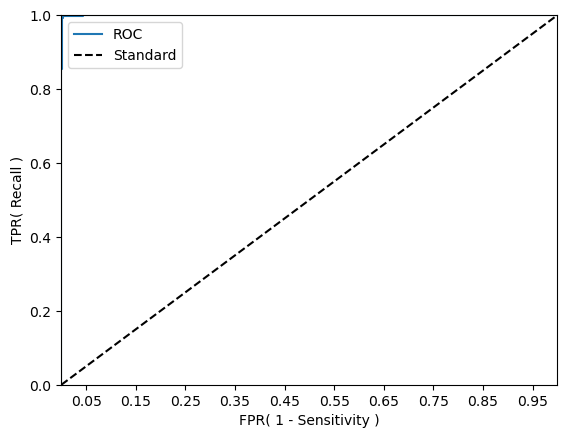

In [66]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, vc.predict_proba(X_test)[:, 1].reshape(-1, 1))

- ROC-AUC: 0.9966라서 맨위에 붙은 모습

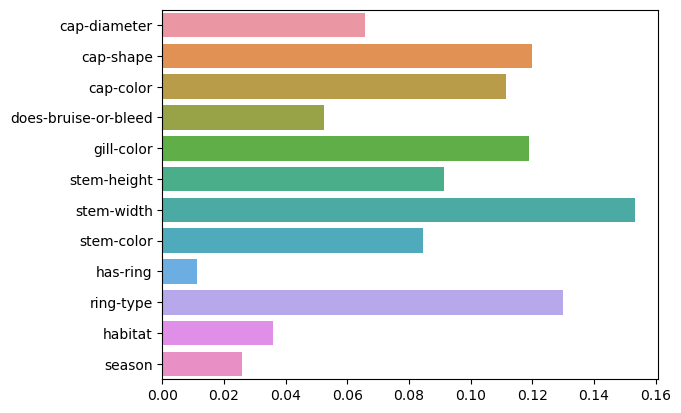

In [67]:
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

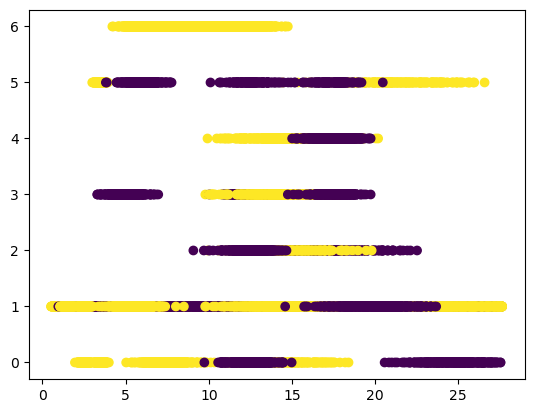

In [68]:
plt.scatter(features.iloc[:, 6], features.iloc[:, -3], c=targets)

In [69]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [70]:
features_6_9 = features.iloc[:, [6, 9]]

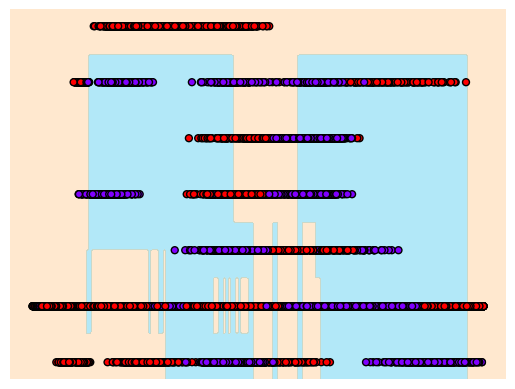

In [82]:
visualize_boundary(vc, features_6_9, targets)

[LightGBM] [Info] Number of positive: 28136, number of negative: 22781
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 50917, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552586 -> initscore=0.211123
[LightGBM] [Info] Start training from score 0.211123


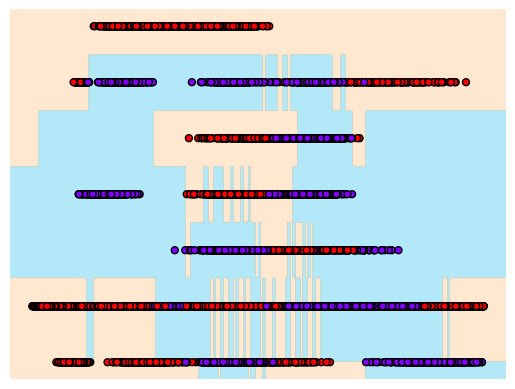

In [72]:
visualize_boundary(vc, features_6_9, targets)

In [73]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [83]:
# 전체 행의 특정 데이터 선택하여 피처로 지정, 타겟 데이터를 타겟으로 지정
features_d, targets_d = mr_df.iloc[:, [0, -6]], mr_df.iloc[:, 9]
features_d

,cap-diameter,stem-color
0,6.87,10
1,8.59,10
2,5.95,10
3,6.51,10
4,7.66,10
...,...,...
50912,1.18,11
50913,1.27,11
50914,1.27,11
50915,1.24,11


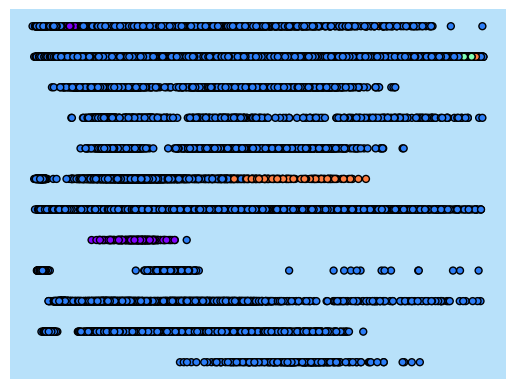

In [84]:
# 데이터 학습
vc.fit(features_d, targets_d)

# 시각화 함수를 통해 데이터 시각화
visualize_boundary(vc, features_d, targets_d)

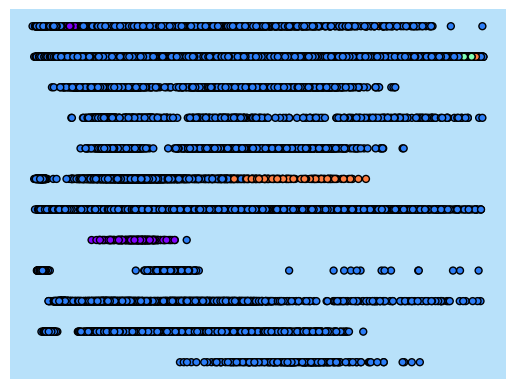

In [85]:
vc = DecisionTreeClassifier(random_state=124, min_samples_leaf=300)

# 데이터 학습
vc.fit(features_d, targets_d)

# 시각화 함수를 통해 데이터 시각화
visualize_boundary(vc, features_d, targets_d)